### Guided Practice: Logit Function and Odds

In [61]:
import numpy as np
import pandas as pd

In [62]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]
#odds_set is odds of success over odds of failure

In [63]:
# looping over the odds set
# we can see higher probability is associated with higher odds
for odds in odds_set:
    log_odds = logit_func(odds)
    probability = sigmoid_func(log_odds)
    print probability

0.833333333333
0.952380952381
0.52380952381
0.642857142857
0.615384615385


In [64]:
#statsmodels need to add a constant, which 
#statsmodels provides you with a nice readable regression summary
import statsmodels.api as sm

In [65]:
#sklearn do not neet to add a constant
from sklearn.linear_model import LogisticRegression

In [66]:
lm = LogisticRegression()

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

In [67]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [68]:
dummies = pd.get_dummies(df['rank'])
df = df.join(dummies)

#dummies is a dataframe, we know this because you join dataframs
#we join on the index
#if you join by name, you need to tell the join key.  If you don't specify the join key it joins by index by default
#df = df.join(pd.get_dummies(df['rank']))

In [69]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [70]:
columns = df.columns.tolist()
print columns

columnsToKeep = columns[1:3] + columns[4:7]
print columnsToKeep

['admit', 'gre', 'gpa', 'rank', 1, 2, 3, 4]
['gre', 'gpa', 1, 2, 3]


In [71]:
from sklearn.cross_validation import train_test_split

X = df[columnsToKeep]
y = df.admit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
type(X_train)

pandas.core.frame.DataFrame

In [73]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
lm.fit(df[columnsToKeep], df['admit'])

#Alternative:  lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])
#you need to set a baseline for dummy variables because of colinearity, you dont want redundant information
#here we are slicing the dataframe and keeping only 1,2,3 (not 4 or Rank)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
import numpy as np

In [76]:
print lm.coef_
print lm.intercept_
print df.admit.mean()

[[  1.63913356e-03   4.33354115e-04   1.15220976e+00   5.14395667e-01
   -3.62326171e-02]]
[-2.09315183]
0.3175


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0]
[[ 0.65170495  0.34829505]
 [ 0.6213355   0.3786645 ]
 [ 0.69345976  0.30654024]
 [ 0.70656221  0.29343779]
 [ 0.65176102  0.34823898]
 [ 0.78722144  0.21277856]
 [ 0.78113884  0.21886116]
 [ 0.62138648  0.37861352]
 [ 0.76383714  0.23616286]
 [ 0.48898375  0.51101625]
 [ 0.60579341  0.39420659]
 [ 0.51357105  0.48642895]
 [ 0.77031439  0.22968561]
 [ 0.78665826  0.21334174]
 [ 0.65171479  0.34828521]
 [ 0.644262    0.355738  ]
 [ 0.72656042  0.27343958]
 [ 0.63666545  0.36333455]
 [ 0.75850176  0.24149824]
 [ 0.56247116  0.43752884]
 [ 0.69345976  0.30654024]
 [ 0.79267236  0.20732764]
 [ 0.62134162  0.37865838]
 [ 0.77605263  0.22394737]
 [ 0.81831149  0.18168851]
 [ 0.77032589  0.22967411]
 [ 0.72062103  0.27937897]
 [ 0.72065069  0.27934931]

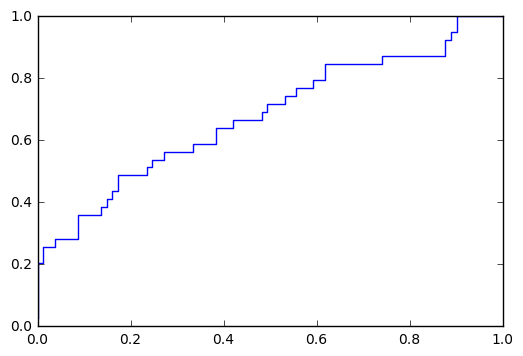

In [88]:
actuals = lm.predict(X_test) 
probas = lm.predict_proba(X_test)

print actuals
print probas

fpr = roc_curve(y_test, probas[:,1])[0]
tpr = roc_curve(y_test, probas[:,1])[1]

plt.plot(fpr, tpr)


#plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1])

In [100]:
np.array(probas[:,1])


predictionDf = pd.DataFrame({"actual" : y_test, "predicted" : np.array(probas[:,1])})
predictionDf
#here we are making a dataframe

threshold = 0
while threshold <= 1:
    columnName = "predicted_class_{}".format(threshold)
    predictionDf[columnName] = predictionDf.predicted.apply(lambda prob: 1 if prob >= threshold else 0)
    #creating a new column for each threshold and that new column will either be 1 (if greater than or equal to the threshold) or 0 if not
    print pd.crosstab(predictionDf.actual, predictionDf[columnName])
    #using crosstab, which is the same thing as a confusion matrix
    #interpretation:  at 10% our mod
    #want to maximize the diagonals.  The best threshold you have will be the same as your roc value
    threshold += 0.05
    

predicted_class_0   1
actual               
0                  81
1                  39
predicted_class_0.05   1
actual                  
0                     81
1                     39
predicted_class_0.1   1
actual                 
0                    81
1                    39
predicted_class_0.15   1
actual                  
0                     81
1                     39
predicted_class_0.2  0   1
actual                    
0                    7  74
1                    0  39
predicted_class_0.25   0   1
actual                      
0                     29  52
1                      6  33
predicted_class_0.3   0   1
actual                     
0                    47  34
1                    14  25
predicted_class_0.35   0   1
actual                      
0                     61  20
1                     18  21
predicted_class_0.4   0   1
actual                     
0                    74   7
1                    25  14
predicted_class_0.45   0   1
actual                 

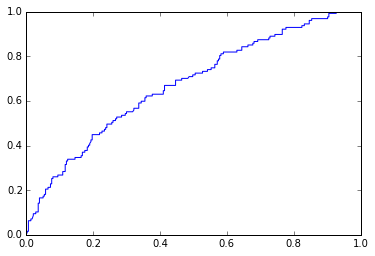

In [75]:
#actuals = lm.predict(feature_set) 
#probas = lm.predict_proba(feature_set)
#plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

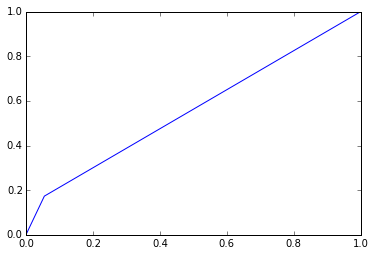

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [91]:
roc_auc_score(y_test, lm.predict(X_test))

0.59639126305792967

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).